# (15) Cos sim revisited (```GABAN```)

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(512)
kws_show = show_kws(7)
kws_show['figsize_x'] = 5.0

translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}
kws_fig = dict(bbox_inches='tight', dpi=300, transparent=True)
fig_dir = pjoin(fig_base_dir, 'rebuttal', 'memberships')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/memberships

In [3]:
%%time

results = similiarity_results(
    mice=mice,
    perc=15,
    num_k=7,
    merge_thres=0.444,
    n_resamples=int(1e4),
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 4min 35s, sys: 1min 8s, total: 5min 44s
Wall time: 5min 44s


[
    'bt_dict',
    'props_bo',
    'props_ca',
    'pi_sorted',
    'sim',
    'sim_overall',
    'sim_b',
    'sim_overall_b',
    'good_runs',
    'sim_run',
    'sim_run_overall',
    'tests',
    'tests_overall'
]

## Save figs (together and one by one)

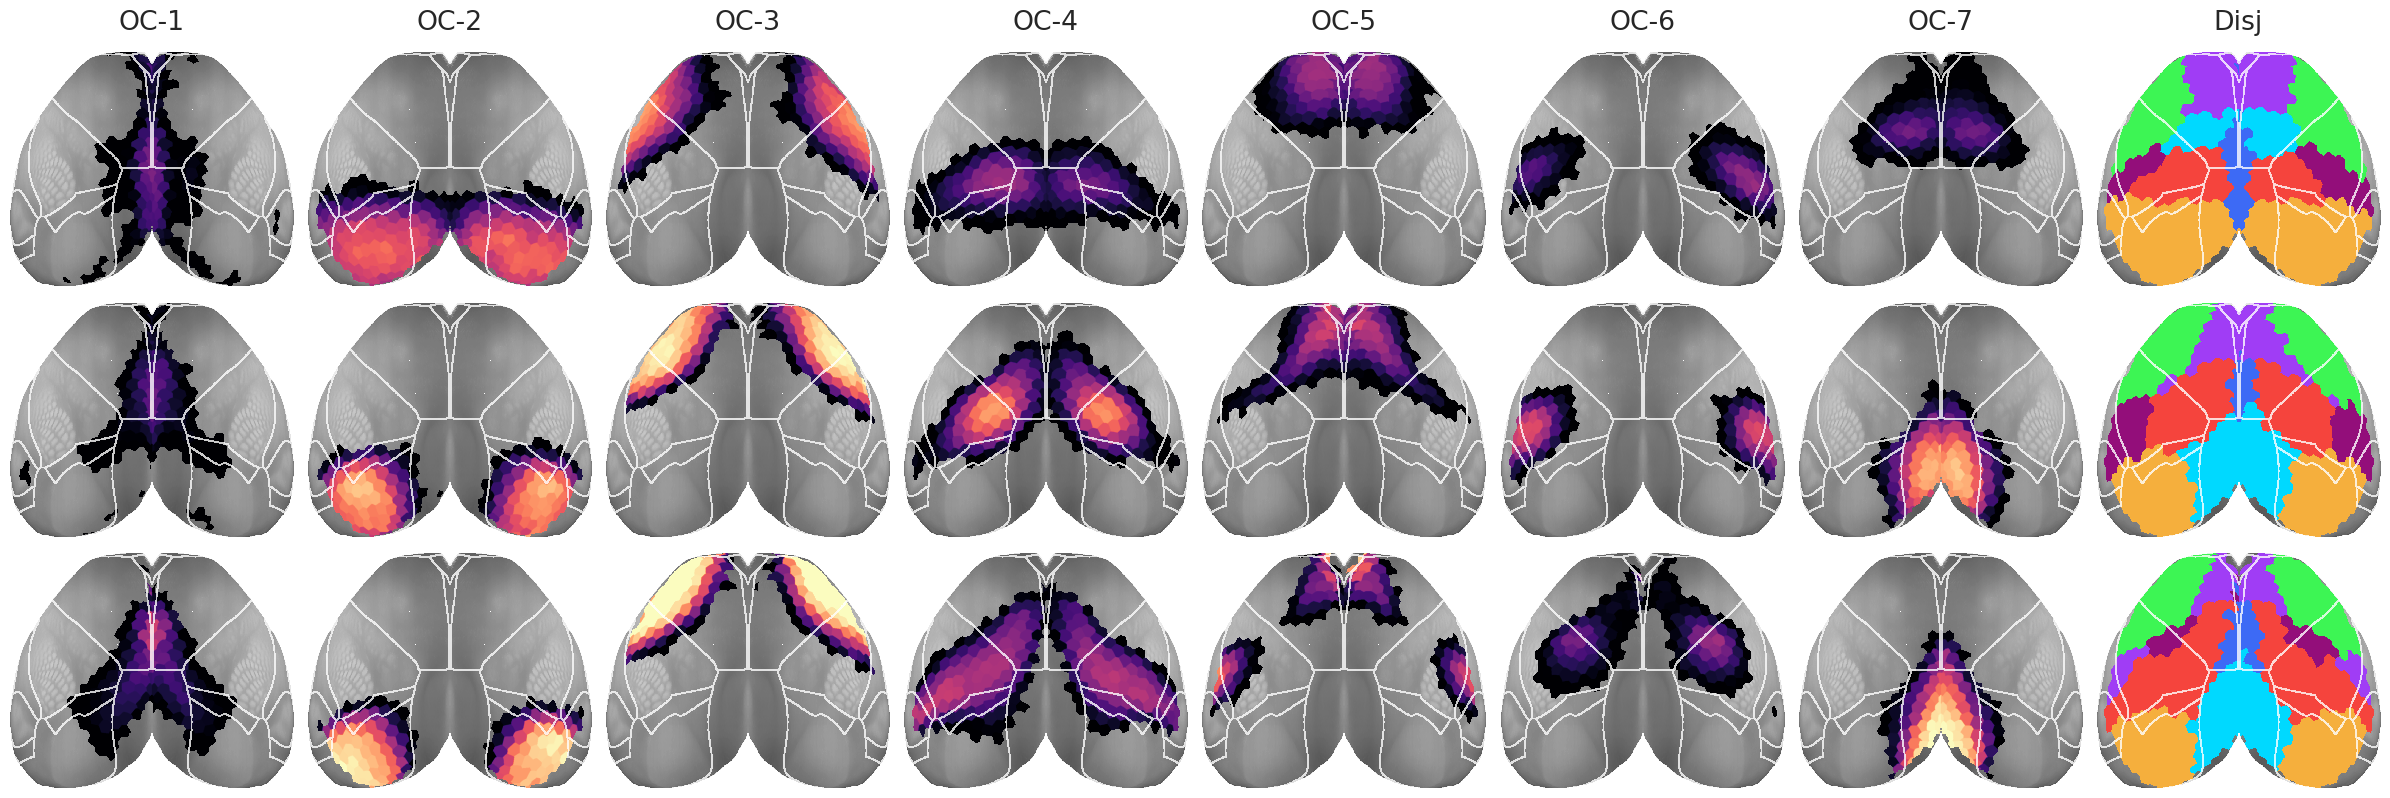

CPU times: user 47.7 s, sys: 468 ms, total: 48.2 s
Wall time: 48.2 s


In [4]:
%%time

_ = bt.show(results['pi_sorted'], **kws_show)

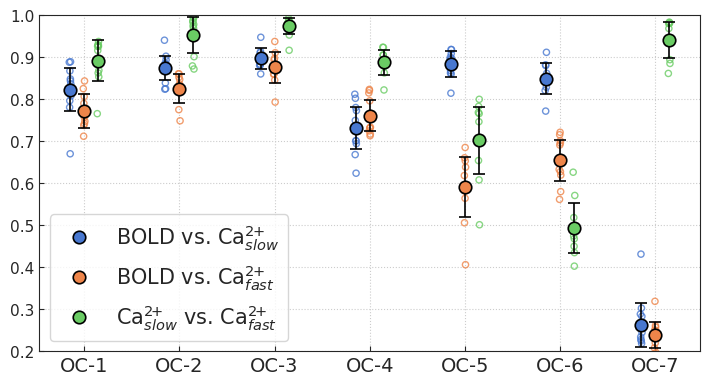

In [5]:
from figures.fig_ocs import similarity_point as go
fig, _ = go(results, False, legend_fontsize=15)

In [31]:
from analysis.final import _cat_data
data = _cat_data(results['bt_dict'])
data.shape

(10, 3, 4, 7, 542, 3)

## Overall

In [22]:
results_overall = {}
for num_k in [3, 7, 20]:
    res = similiarity_results(
        mice=mice,
        perc=15,
        num_k=num_k,
        n_resamples=int(1e4),
        merge_thres=0.444 if
        num_k == 7 else None,
    )
    results_overall[num_k] = res

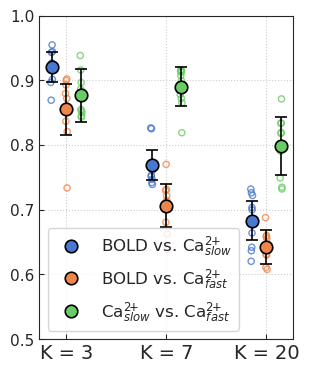

In [23]:
from figures.fig_ocs import similarity_point as go
fig, _ = go(results_overall, True)

In [24]:
from figures.fig_ocs import _scores_arr

scores, std_err = _scores_arr(results_overall, True)

In [25]:
scores.shape

(10, 3, 3)

In [26]:
std_err * get_tval()

array([[0.02346992, 0.03969952, 0.0408172 ],
       [0.0236835 , 0.03322917, 0.02990365],
       [0.03026581, 0.02616639, 0.04409047]])

In [21]:
# was 1e2

array([[0.0226428 , 0.0345377 , 0.04125592],
       [0.02403162, 0.02969121, 0.02711633],
       [0.03045916, 0.02596365, 0.04531386]])